# FAILED!!!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import h5py
import pywt


In [2]:
# label_dict = {'good':0, 'holes_cuts':1, 'threaderror':2, 'oilstains_colorerror':3, 'wrinkles':4, 'foreignbodies':5}
file_path = r'/home/soucs/Python/textile-defect-inspection/dataset/textile_defect_data.hdF5'
imgs = h5py.File(file_path)['jute_defect_imgs'][:]
labels = h5py.File(file_path)['jute_defect_labels'][:]

In [8]:
def IMG(i):
    return resize_img(imgs[i])
def resize_img(img):
    dim = (500, 500)
    return cv.resize(img,dim,interpolation=cv.INTER_AREA)
def show(imgs):
    for i, img in enumerate(imgs):
        cv.imshow('img'+str(i),img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
# def coMat(img,levels = 256):
#     # Define the distance and angle offsets for co-occurrence
#     d = 1
#     theta = 0
#     # Compute the co-occurrence matrix
#     co_mat = np.zeros((levels, levels), dtype=np.uint32)
#     for i in range(d, img.shape[0]):
#         for j in range(d, img.shape[1]):
#             i_index = img[i, j]
#             j_index = img[i-d, j+theta]
#             co_mat[i_index, j_index] += 1
#     # Normalize the co-occurrence matrix
#     co_mat = co_mat.astype(np.float64)
#     co_mat /= np.sum(co_mat)
#     # Print the co-occurrence matrix
#     return co_mat

In [5]:
def get_cor(img):
    cor_li = {}
    step, ksize = 10, 100
    # imgk = img[:100,:100]
    for i in range(step,400,step):
        for j in range(step,400,step):
            corr_coef = np.corrcoef(img[i:100+i,j:100+j].reshape(-1), img[i-step:100+i-step,j-step:100+j-step].reshape(-1))[0, 1]
            corr = abs(round(corr_coef,2))
            val = (i,j)
            if corr in cor_li.keys():
                cor_li[corr].append(val)
            else:
                cor_li[corr] = [val]
    return cor_li
def correlation_feature(img):
    c = get_cor(img)
    feature = 0
    for key in sorted(c):
        if key<=0.1:
            feature+=len(c[key])
        else:
            break
    return (feature)

In [6]:
col = []
for img in imgs:
    feature = correlation_feature(img)
    col.append(feature)

<Axes: xlabel='y', ylabel='x'>

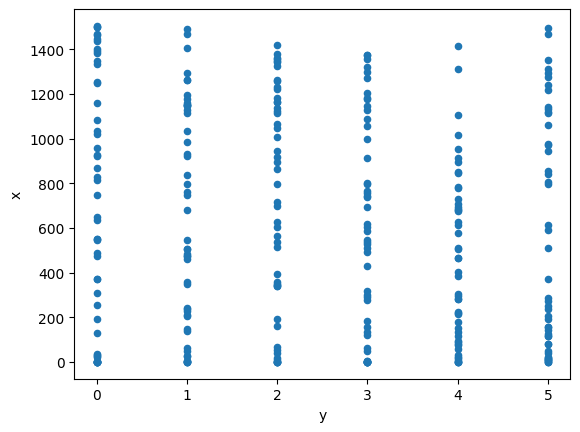

In [32]:
df = pd.DataFrame({'x':col,'y':labels})
df.plot.scatter('y','x')

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [71]:
df = pd.DataFrame({'x':col,'y':labels})
df1 = pd.read_csv('/home/soucs/Python/textile-defect-inspection/dataset/hist_features.csv')
df = pd.concat([df1, df], axis=1)

In [72]:
X = df[['c1','c2','c3','c4','c5','x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

pca = PCA(n_components=1)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train[['c1','c2','c3','c4','c5']])).set_index(X_train[['x']].index)
X_test_pca = pd.DataFrame(pca.transform(X_test[['c1','c2','c3','c4','c5']])).set_index(X_test[['x']].index)

X_train = pd.concat([X_train_pca,X_train[['x']]],axis = 1)
X_test = pd.concat([X_test_pca,X_test[['x']]], axis=1)

In [73]:
X_train.rename(columns = {0:'TEST'}, inplace = True)
X_test.rename(columns = {0:'TEST'}, inplace = True)

In [74]:
# SVM Classification
svc = SVC(decision_function_shape='ovo')
svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

0.3333333333333333
[[ 6  0  0  0  0  8]
 [ 1  4  3  1  1  4]
 [ 4  1  1  2  1  5]
 [ 4  2  0  2  2  5]
 [ 0  1  0  2 12  3]
 [ 5  2  2  1  0  5]]


# Test

In [2]:
file_path = r'/home/soucs/Python/textile-defect-inspection/dataset/textile_defect_data.hdF5'
imgs = h5py.File(file_path)['images'][:]
labels = h5py.File(file_path)['labels'][:]
fabric = h5py.File(file_path)['fabric'][:]

In [3]:
imgs.shape,labels.shape,fabric.shape

((1199, 512, 768), (1199,), (1199,))

In [10]:
show([imgs[0],imgs[350],imgs[-1]])

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/soucs/Python/textile-defect-inspection/textile-venv/lib/python3.10/site-packages/cv2/qt/plugins"
